In [2]:
!pip3 install mkl

     |████████████████████████████████| 193.8 MB 106 kB/s  eta 0:00:011   |███████████████                 | 90.6 MB 15.3 MB/s eta 0:00:07
     |████████████████████████████████| 1.1 MB 17.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/masamasakobakoba/.pyenv/versions/anaconda3-5.3.1/bin/python -m pip install --upgrade pip' command.


In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
palette = 'muted'
sns.set_palette(palette); sns.set_color_codes(palette)
import warnings
warnings.simplefilter('ignore')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# 演習2.6

## 2.1

In [ ]:
def posterior_grid(grid_points, heads, tosses):
    grid = np.linspace(0, 1, grid_points)
    
    prior = np.repeat(5, grid_points)
    
    likelihood = stats.binom.pmf(heads, tosses, grid)
    
    unstd_posterior = likelihood * prior
    
    posterior = unstd_posterior / unstd_posterior.sum()
    
    return grid, posterior

In [ ]:
grid, posterior = posterior_grid(grid_points=15, heads=1, tosses=4)
plt.plot(grid, posterior, "-o", label=f"heads = {1}\n tosses = {4}")
plt.xlabel(r'$\theta$', fontsize=14)
plt.legend(loc=0, fontsize=14)

In [14]:
trials =4
theta_real = 0.35  # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)

In [21]:
with pm.Model() as base_model:
    theta = pm.Beta("θ Beta(alpha=1, beta=1)", alpha=1., beta=1.)
    y = pm.Bernoulli("y", p=theta, observed=data)
    trace_baseline = pm.sample(10000, random_seed=123)
    

# with pm.Model() as our_first_model:
#     # a priori
#     theta = pm.Beta('θ Beta(alpha=1, beta=1)', alpha=1., beta=1.)
#     # likelihood
#     y = pm.Bernoulli('y', p=theta, observed=data)
#     trace_baseline = pm.sample(10000, random_seed=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ Beta(alpha=1, beta=1)]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:05<00:00, 7868.99draws/s]


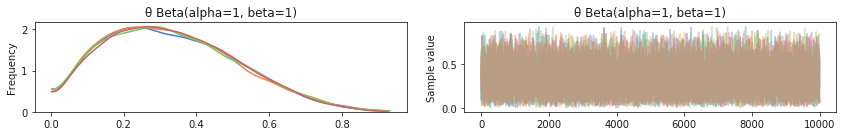

In [23]:
pm.traceplot(trace_baseline, lines={"theta": theta_real});

In [24]:
pm.summary(trace_baseline)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
"θ Beta(alpha=1, beta=1)",0.333418,0.177757,0.001069,0.028513,0.668163,17358.617827,0.999986
